<a href="https://colab.research.google.com/github/taranggpt6/Deep-Learning-CV-Janatahack-Vehicle-Classification/blob/main/JanataHack_Computer_Vision_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import os
import cv2
import shutil

import tensorflow as tf
print(tf.__version__)

import warnings
warnings.filterwarnings('ignore')

1.13.1


In [ ]:
train = pd.read_csv(r"C:\Users\Tamma\Desktop\PGD ML & AI\DataSets\AnalyticsVidyaHackathon\Computer Vision\train_SOaYf6m\train.csv")
test = pd.read_csv(r"C:\Users\Tamma\Desktop\PGD ML & AI\DataSets\AnalyticsVidyaHackathon\Computer Vision\test_vc2kHdQ.csv")

print(train.shape)
print(test.shape)

(1646, 2)
(706, 1)


In [ ]:
train.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


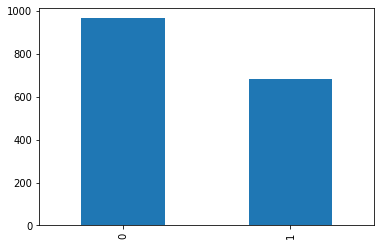

In [ ]:
train.emergency_or_not.value_counts().plot(kind='bar')


1. 0 - Non-Emergency
2. 1 - Emergency

In [ ]:
image_path = r'C:\Users\Tamma\Desktop\PGD ML & AI\DataSets\AnalyticsVidyaHackathon\Computer Vision\train_SOaYf6m\images'

image_dir = os.path.join(image_path)
print(image_dir)
images = os.listdir(image_dir) #All Images
len(images)

C:\Users\Tamma\Desktop\PGD ML & AI\DataSets\AnalyticsVidyaHackathon\Computer Vision\train_SOaYf6m\images


2352

In [ ]:

print('Train Images names with Lables (csv):',train.shape) #all Train images with labels
# print('-'*60)

def plot_train_image():
    #generating random index to see the random image
    random_image = np.random.randint(0,len(train.image_names))
    print('Random image index :',random_image) #random image index
    img = cv2.imread(image_dir+'\\'+train.image_names[random_image]) #reading the random image from the train set 
    print('\nShape of Image :',img.shape) #shape of the image
    plt.imshow(img)
    plt.title(train.image_names[random_image]) #name of the image
    label = 'Non_Emergency 'if train.emergency_or_not[random_image]==0 else 'Emergency'
    col = 'green' if train.emergency_or_not[random_image]==0 else 'red'
    plt.xlabel(label,color=col) #label of the image
    return

Train Images names with Lables (csv): (1646, 2)


Random image index : 1373

Shape of Image : (224, 224, 3)


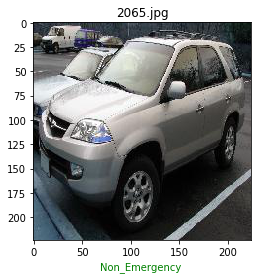

In [ ]:
plot_train_image()

In [ ]:
target_path = r'C:\Users\Tamma\Desktop\Python Files\Computer Vision'
target_dir = os.path.join(target_path)
print(target_dir)

try:
    #Train Directory
    os.mkdir(target_dir+'\\'+'Vehicle_Images')
    os.mkdir(target_dir+'\\'+'Vehicle_Images\\Train_Images')
    os.mkdir(target_dir+'\\'+'Vehicle_Images\\Train_Images\\Emergency_Veh')
    os.mkdir(target_dir+'\\'+'Vehicle_Images\\Train_Images\\Non_Emergency_Veh')
    #Test Directory
    os.mkdir(target_dir+'\\'+'Vehicle_Images\\Test_Images')
    os.mkdir(target_dir+'\\'+'Vehicle_Images\\Test_Images\\Emergency_Veh')
    os.mkdir(target_dir+'\\'+'Vehicle_Images\\Test_Images\\Non_Emergency_Veh')
except OSError:
    pass

C:\Users\Tamma\Desktop\Python Files\Computer Vision


In [ ]:
train_dir = r'C:\Users\Tamma\Desktop\Python Files\Computer Vision\Vehicle_Images\Train_Images'
TRAIN_DIR = os.path.join(train_dir)
print(TRAIN_DIR)

test_dir = r'C:\Users\Tamma\Desktop\Python Files\Computer Vision\Vehicle_Images\Test_Images'
TEST_DIR = os.path.join(test_dir)
print(TEST_DIR)

print(image_dir)

C:\Users\Tamma\Desktop\Python Files\Computer Vision\Vehicle_Images\Train_Images
C:\Users\Tamma\Desktop\Python Files\Computer Vision\Vehicle_Images\Test_Images
C:\Users\Tamma\Desktop\PGD ML & AI\DataSets\AnalyticsVidyaHackathon\Computer Vision\train_SOaYf6m\images


In [ ]:
non_emergency = train.loc[train.emergency_or_not==0]
emergency = train.loc[train.emergency_or_not==1]

print(non_emergency.shape)
print(emergency.shape)

(965, 2)
(681, 2)


#### To Train the images:
Let's use 750 images from non_emergency class vehicles and 600 images from emergency class vehicles

In [ ]:
#names of all training images from class non_emergency
all_non_emer_imgs = list(non_emergency.image_names)
all_emer_imgs = list(emergency.image_names)

def split_train_test():
    #copying 750 images of non_emergency vehicles to train folder
    for image in all_non_emer_imgs[:step_non_emer]:
        shutil.copyfile(image_dir + '\\'+ image, train_non_emer_dir +image)
    #copying rest images of non_emergency vehicles to test folder
    for image in all_non_emer_imgs[step_non_emer:]:
        shutil.copyfile(image_dir + '\\'+ image, test_non_emer_dir +image)

    #copying 600 images of emergency vehicles to train folder
    for image in all_emer_imgs[:step_emer]:
        shutil.copyfile(image_dir + '\\'+ image, train_emer_dir +image)
    #copying rest images of emergency vehicles to test folder
    for image in all_emer_imgs[step_emer:]:
        shutil.copyfile(image_dir + '\\'+ image, test_emer_dir +image)
    return
    
step_non_emer = 750
step_emer = 600

#directories for non_emregency vehicles
train_non_emer_dir = TRAIN_DIR + '\\' + 'Non_Emergency_Veh\\'
test_non_emer_dir = TEST_DIR + '\\' + 'Non_Emergency_Veh\\'

#directories for emregency vehicles
train_emer_dir = TRAIN_DIR + '\\' + 'Emergency_Veh\\'
test_emer_dir = TEST_DIR + '\\' + 'Emergency_Veh\\'

split_train_test()

In [ ]:
print('Non_Emergency Vehicles for training : ',len(os.listdir(train_non_emer_dir)))
print('Non_Emergency Vehicles for testing  : ',len(os.listdir(test_non_emer_dir)))
print('Emergency Vehicles for trainig      : ',len(os.listdir(train_emer_dir)))
print('Emergency Vehicles for testing      : ',len(os.listdir(test_emer_dir)))

Non_Emergency Vehicles for training :  750
Non_Emergency Vehicles for testing  :  215
Emergency Vehicles for trainig      :  600
Emergency Vehicles for testing      :  81


Train Images ->>
1. Non_Emergency : 750
2. Emergency : 600


Test Images ->>
1. Non_Emergency : 215
2. Emergency : 81

In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
valid_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_gen.flow_from_directory(TRAIN_DIR,
                                                batch_size=16,
                                                target_size=(220,220),
                                                class_mode='binary',
                                                color_mode='rgb'
                                               )

validation_generator = valid_gen.flow_from_directory(TEST_DIR,
                                                batch_size=16,
                                                target_size=(220,220),
                                                class_mode='binary',
                                                color_mode='rgb'
                                               )

Found 1350 images belonging to 2 classes.
Found 296 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same',input_shape=(220,220,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flat

In [ ]:
results = model.fit_generator(train_generator,
                   epochs=10,
                   validation_data=validation_generator)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
85/85 [==============================] - 129s 2s/step - loss: 0.6754 - acc: 0.5785 - val_loss: 0.6221 - val_acc: 0.7500
Epoch 2/10
85/85 [==============================] - 125s 1s/step - loss: 0.6366 - acc: 0.6474 - val_loss: 0.6236 - val_acc: 0.6791
Epoch 3/10
85/85 [==============================] - 128s 2s/step - loss: 0.6002 - acc: 0.6874 - val_loss: 0.5368 - val_acc: 0.7736
Epoch 4/10
85/85 [==============================] - 131s 2s/step - loss: 0.5434 - acc: 0.7400 - val_loss: 0.4657 - val_acc: 0.7804
Epoch 5/10
85/85 [==============================] - 126s 1s/step - loss: 0.4974 - acc: 0.7585 - val_loss: 0.4239 - val_acc: 0.8074
Epoch 6/10
85/85 [==============================] - 130s 2s/step - loss: 0.4677 - acc: 0.7896 - val_loss: 0.4475 - val_acc: 0.7973
Epoch 7/10
85/85 [==============================] - 130s 2s/step - loss: 0.4319 - acc: 0.8015 - val_loss: 0.3950 - val_acc: 0.8209
Epoch 8/10
85/85 [=================

In [ ]:
# Decsent Accuracy , Let's Try if we can achieve more

#added batch normalization after each convolution and added one more convolution unit with 128 filters

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same',input_shape=(220,220,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 16)      448       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 220, 220, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 108, 108, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv

In [ ]:
results = model.fit_generator(train_generator,
                   epochs=10,
                   validation_data=validation_generator,
                   verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
85/85 [==============================] - 529s 6s/step - loss: 0.6073 - acc: 0.7333 - val_loss: 0.7242 - val_acc: 0.4189
Epoch 2/10
85/85 [==============================] - 519s 6s/step - loss: 0.2605 - acc: 0.8978 - val_loss: 0.4705 - val_acc: 0.7500
Epoch 3/10
85/85 [==============================] - 484s 6s/step - loss: 0.1366 - acc: 0.9533 - val_loss: 0.4374 - val_acc: 0.7973
Epoch 4/10
85/85 [==============================] - 399s 5s/step - loss: 0.0629 - acc: 0.9852 - val_loss: 0.5098 - val_acc: 0.8108
Epoch 5/10
85/85 [==============================] - 518s 6s/step - loss: 0.0275 - acc: 0.9970 - val_loss: 0.4717 - val_acc: 0.8108
Epoch 6/10
85/85 [==============================] - 485s 6s/step - loss: 0.0227 - acc: 0.9970 - val_loss: 0.4262 - val_acc: 0.8581
Epoch 7/10
85/85 [==============================] - 500s 6s/step - loss: 0.0157 - acc: 0.9978 - val_loss: 0.4508 - val_acc: 0.8412
Epoch 8/10
85/85 [=================

In [ ]:
#Model is bit Overfit , Let's add Dropout after Dense and see the results

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same',input_shape=(220,220,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 220, 220, 16)      448       
_________________________________________________________________
batch_normalization_v1_12 (B (None, 220, 220, 16)      64        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 108, 108, 32)      4640      
_________________________________________________________________
batch_normalization_v1_13 (B (None, 108, 108, 32)      128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 52, 52, 64)        18496     
__________

In [ ]:
try:
    os.mkdir(target_dir + '\\'+'Models')
except OSError:
    pass

model_dir = os.path.join(target_dir + '\\'+'Models\\')
# model_dir
filepath = model_dir + 'model-{epoch:05d}-{acc:.5f}-{val_acc:.5f}.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc',save_best_only=True, mode='auto')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc',patience=3)

callback_list = [checkpoint,early_stopping]

results = model.fit_generator(train_generator,
                   epochs=10,
                   validation_data=validation_generator,
                   callbacks=callback_list,
                   verbose=1)

Epoch 1/10
85/85 [==============================] - 416s 5s/step - loss: 0.6355 - acc: 0.7444 - val_loss: 0.7898 - val_acc: 0.2973
Epoch 2/10
85/85 [==============================] - 378s 4s/step - loss: 0.3554 - acc: 0.8370 - val_loss: 0.6414 - val_acc: 0.5980
Epoch 3/10
85/85 [==============================] - 383s 5s/step - loss: 0.2454 - acc: 0.9015 - val_loss: 0.4721 - val_acc: 0.7905
Epoch 4/10
85/85 [==============================] - 360s 4s/step - loss: 0.1702 - acc: 0.9400 - val_loss: 0.4530 - val_acc: 0.8243
Epoch 5/10
85/85 [==============================] - 359s 4s/step - loss: 0.1005 - acc: 0.9689 - val_loss: 0.4455 - val_acc: 0.8345
Epoch 6/10
85/85 [==============================] - 359s 4s/step - loss: 0.0717 - acc: 0.9815 - val_loss: 0.4562 - val_acc: 0.8446
Epoch 7/10
85/85 [==============================] - 359s 4s/step - loss: 0.0421 - acc: 0.9933 - val_loss: 0.4342 - val_acc: 0.8581
Epoch 8/10
85/85 [==============================] - 360s 4s/step - loss: 0.0329 - a

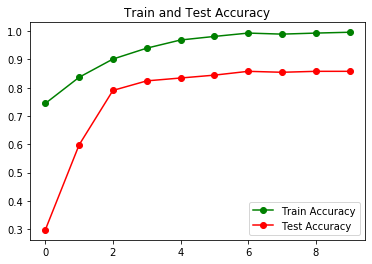

In [ ]:
train_accuracy = results.history['acc']
validation_accuracy = results.history['val_acc']
epochs = range(0,len(train_accuracy))

plt.plot(epochs,train_accuracy,'go-',label='Train Accuracy')
plt.plot(epochs,validation_accuracy,'ro-',label='Test Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()

Predictions on Unseen Images

In [ ]:
final_model = tf.keras.models.load_model(model_dir+'model-00007-0.99333-0.85811.h5')# final_model.predict

#### Transfer Learning

In [ ]:
model = tf.keras.applications.VGG16(weights='imagenet',
                                       include_top=False,
                                       input_shape=(220,220,3))

for layer in model.layers:
    layer.trainable = False
    
output = model.output
    
x = tf.keras.layers.GlobalAveragePooling2D()(output)
x = tf.keras.layers.Dense(512,activation='relu')(x)
x = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=model.input, outputs=x)

model.compile(loss=tf.keras.losses.binary_crossentropy,
             optimizer=tf.keras.optimizers.RMSprop(),
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 220, 220, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 220, 220, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 220, 220, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 110, 110, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 110, 110, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 110, 110, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 55, 55, 128)       0         
__________

In [ ]:
try:
    os.mkdir(target_dir + '\\'+'Models')
except OSError:
    pass

model_dir = os.path.join(target_dir + '\\'+'Models\\')
# model_dir
filepath = model_dir + 'transfer_model-{epoch:05d}-{acc:.5f}-{val_acc:.5f}.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc',save_best_only=False, mode='auto')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc',patience=3)

callback_list = [checkpoint,early_stopping]


results = model.fit_generator(train_generator,
                   epochs=10,
                   validation_data=validation_generator,
                   callbacks=callback_list,
                   verbose=1)

Epoch 1/10
85/85 [==============================] - 2276s 27s/step - loss: 0.4817 - acc: 0.7644 - val_loss: 0.2949 - val_acc: 0.8818
Epoch 2/10
85/85 [==============================] - 1951s 23s/step - loss: 0.3405 - acc: 0.8378 - val_loss: 0.3195 - val_acc: 0.8682
Epoch 3/10
85/85 [==============================] - 1954s 23s/step - loss: 0.3056 - acc: 0.8770 - val_loss: 0.2433 - val_acc: 0.9020
Epoch 4/10
85/85 [==============================] - 1843s 22s/step - loss: 0.2599 - acc: 0.8948 - val_loss: 0.2326 - val_acc: 0.9088
Epoch 5/10
85/85 [==============================] - 1876s 22s/step - loss: 0.2505 - acc: 0.8993 - val_loss: 0.2393 - val_acc: 0.9054
Epoch 6/10
85/85 [==============================] - 1736s 20s/step - loss: 0.2287 - acc: 0.9104 - val_loss: 0.2561 - val_acc: 0.9020
Epoch 7/10
85/85 [==============================] - 1803s 21s/step - loss: 0.2266 - acc: 0.9133 - val_loss: 0.2722 - val_acc: 0.9020


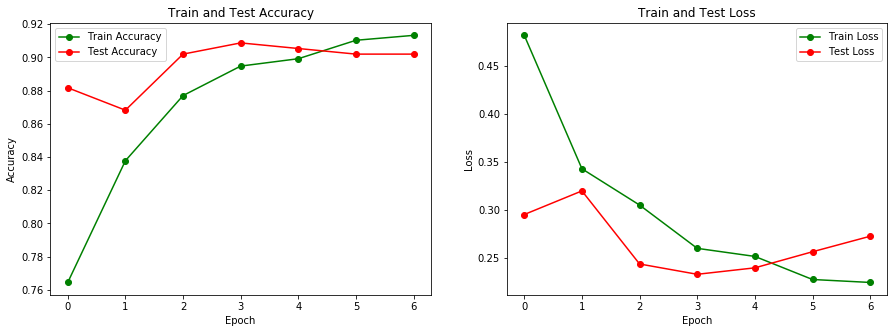

In [ ]:
train_accuracy = results.history['acc']
validation_accuracy = results.history['val_acc']

train_loss = results.history['loss']
validation_loss = results.history['val_loss']
epochs = range(0,len(train_accuracy))


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs,train_accuracy,'go-',label='Train Accuracy')
plt.plot(epochs,validation_accuracy,'ro-',label='Test Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,train_loss,'go-',label='Train Loss')
plt.plot(epochs,validation_loss,'ro-',label='Test Loss')
plt.title('Train and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

After epoch 4 , validation loss starts increasing <br>
at 4th epoch , accuracy of train and test are pretty good , Let's use 4th epoch model as best model

In [ ]:
final_tr_model = tf.keras.models.load_model(model_dir+'transfer_model-00004-0.89481-0.90878.h5')# final_model.predict

In [ ]:
test.head()

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg


In [ ]:
# test_dir = os.path.join(target_dir+'\\'+'Vehicle_Images')
# try:
#     os.mkdir(test_dir+'\\'+'Unseen Images')
# except OSError:
#     pass

# unseen_dir = os.path.join(test_dir+'\\'+'Unseen Images\\')

# for image in test.image_names:
#         shutil.copyfile(image_dir + '\\'+ image, unseen_dir +image)

In [ ]:
# test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# unseen_generator = test_gen.flow_from_directory(unseen_dir,
#                                                 classes=['test'],
#                                                 batch_size=16,
#                                                 target_size=(220,220),
#                                                 class_mode=None,
#                                                 color_mode='rgb'
#                                                )

# final_tr_model.predict_generator(unseen_generator)

In [ ]:
# temp_img = cv2.imread(unseen_dir+test.image_names[0])
# temp_img = cv2.resize(temp_img,(220,220))
# temp_img = temp_img/255
# temp_img = temp_img.reshape(1,220,220,3)
# # plt.imshow(temp_img)
# # np.argmax(final_tr_model.predict(temp_img))
# 0 if final_tr_model.predict(temp_img)[0][0]<0.50 else 1

In [ ]:
def predict(img):
    temp_img = cv2.imread(image_dir+'\\'+img)
    temp_img = cv2.resize(temp_img,(220,220))
    temp_img = temp_img/255
    temp_img = temp_img.reshape(1,220,220,3)
    return(0 if final_tr_model.predict(temp_img)[0][0]<0.50 else 1)


predictions = [predict(imag) for imag in list(test.image_names)]


In [ ]:
test['emergency_or_not'] = predictions

In [ ]:
# test.to_csv('final_VGG16.csv',index=False)

In [ ]:
test

,image_names,emergency_or_not
0,1960.jpg,1
1,668.jpg,0
2,2082.jpg,1
3,808.jpg,0
4,1907.jpg,1
...,...,...
701,674.jpg,0
702,1027.jpg,1
703,447.jpg,0
704,2176.jpg,1
